In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [2]:
# Abrir o dataset
df_pontuacao = pd.read_csv('.\datasets\pontuacao_teste.csv')

In [3]:
# Checar estrutura do Dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# Visualizar DF
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
# Visualizar final do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [6]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

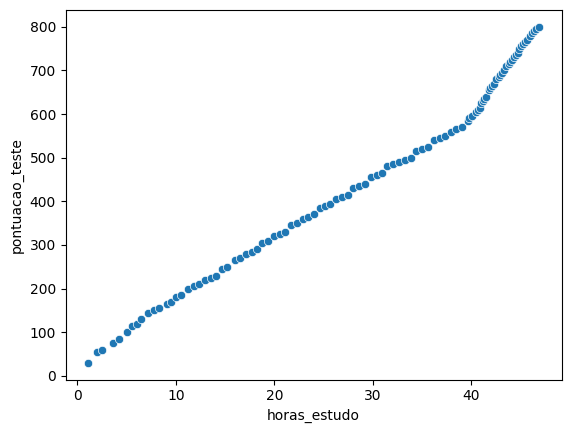

In [7]:
# Plot de Dispersão
# X = horas de estudo
# Y = Pontuação de Teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: xlabel='horas_estudo'>

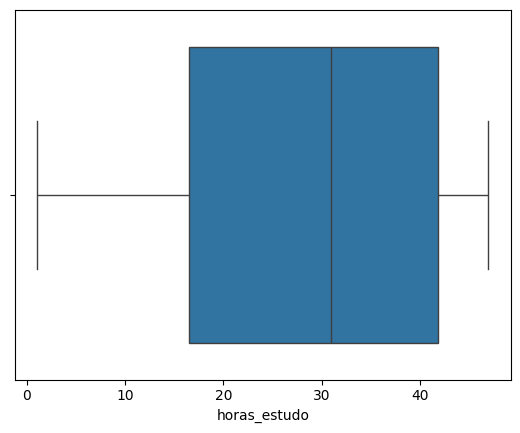

In [8]:
# Verificar se temos outliers
# Plot Boxplot
sns.boxplot(data=df_pontuacao, x='horas_estudo')

<Axes: xlabel='pontuacao_teste'>

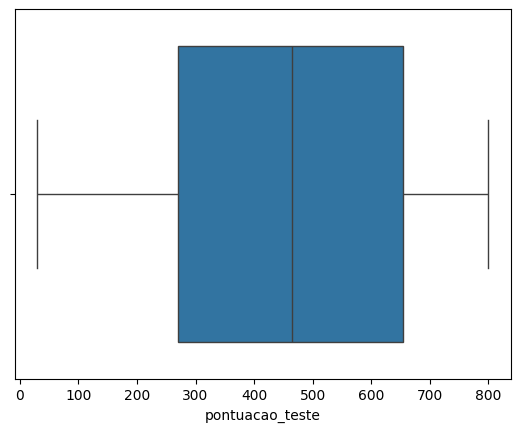

In [9]:
# Verificar se temos outliers
# Plot Boxplot
sns.boxplot(data=df_pontuacao, x='pontuacao_teste')

<Axes: >

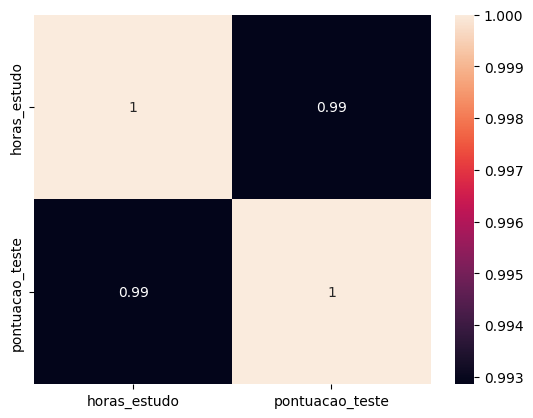

In [10]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

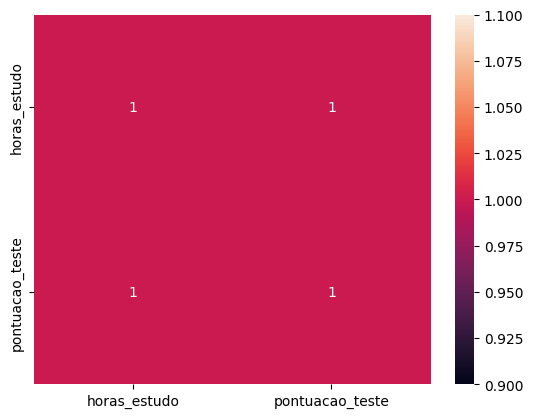

In [11]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

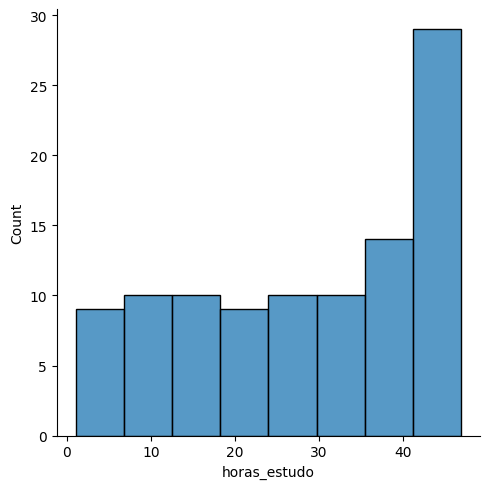

In [12]:
# Histograma das Variáveis
sns.displot(data=df_pontuacao, x='horas_estudo')

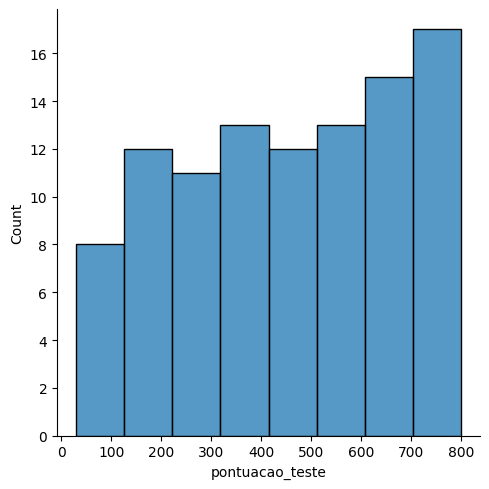

In [13]:
# Histograma das Variáveis
sns.displot(data=df_pontuacao, x='pontuacao_teste')

### Treinar Modelo

In [14]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature, precisamos reajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
Y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_teste, y_train, y_teste = train_test_split(X, Y, test_size=0.30, random_state=50)

In [15]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [16]:
# Treinar o Modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Imprimir a equação da Reta
# y = ax + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0],
                                                      reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Validador de Métricas

In [18]:
# Predição dos Valores com base no Conjunto de Testes
y_pred = reg_model.predict(X_teste)

In [23]:
# Calcular métrica R-Squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_score(y_pred, y_teste)

0.9831243756603719

In [20]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Media (y_teste - y_pred)
# É uma métrica fácil de interpretar
# MAE é menos sensível a outliers
mean_absolute_error(y_teste, y_pred)

22.957470277134615

In [21]:
# Calcular MSE - Mean Squared Error
# MSE = Media (y_teste - y_pred)^2
# Não é uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza erros
mean_squared_error(y_teste, y_pred)

766.9972992416427

In [25]:
# Calcular RMSE - Squared Root Mean Squared Error
# MSE = Raiz (Media (y_teste - y_pred)^2)
# É uma métrica fácil de interpretar
# MSE é mais sensível a outliers e penaliza erros
root_mean_squared_error(y_teste, y_pred)

27.69471608884342

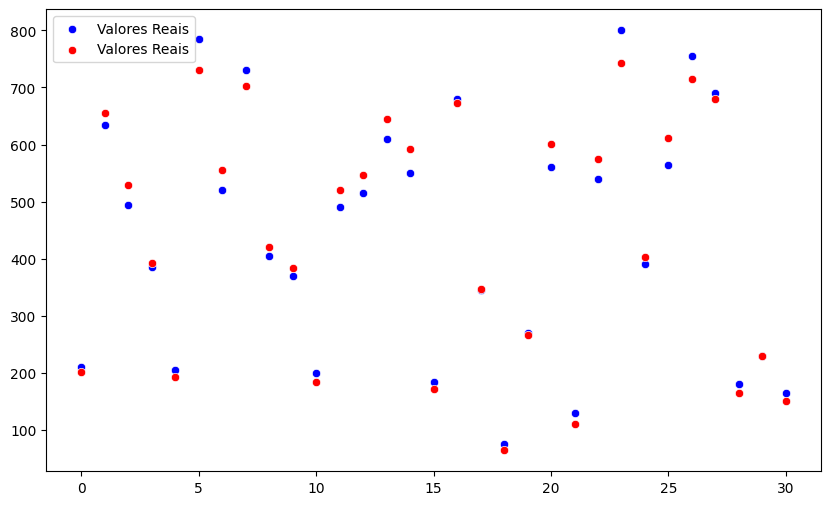

In [26]:
# Análise Gráfica
x_axis = range(len(y_teste))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_teste.reshape(-1), color='blue', label = 'Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label = 'Valores Reais')
plt.legend()
plt.show()

### Análise de Resíduos

In [27]:
# Calcular Resíduos
residuos = y_teste - y_pred

In [28]:
# Calcular os resíduos padronizados (standarization)
# Para cada elemento de um conjunto (x - media) / desvio padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

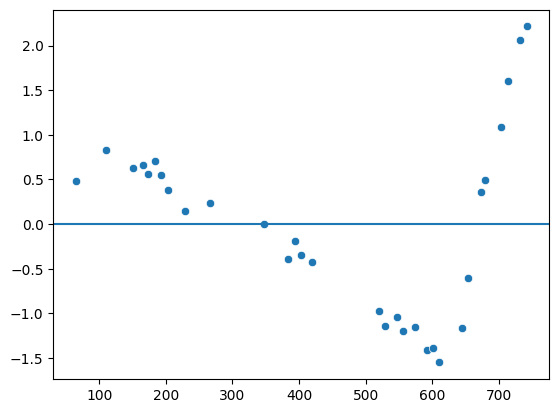

In [29]:
# Verificar Linearidade do modelo:
# Se os resíduos estiverem entre -2 e 2 (na escala padrão) - indica linearidade

# Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário
# se tivermos alguma tendência ou padrão (forma de cone ou funil), temos heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

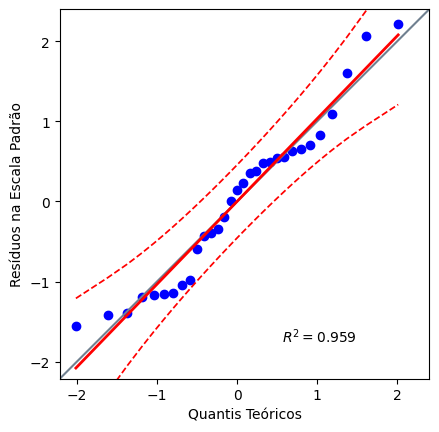

In [30]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue a distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na Escala Padrão')
plt.show()

In [32]:
# Teste de Normalidade de Shapiro Wilk
# H0 segue distribuição normal
# H1 não segue distribuição normal
# Se o p-valor > 0.05 não rejeito HO, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print('Estatística do Teste: {} e P-Valor: {}'.format(stat_shapiro, p_valor_shapiro))

Estatística do Teste: 0.9500532226161759 e P-Valor: 0.15663817850304973


In [33]:
# Teste de Normalidade de Kolmogorov-Smirnov
# H0 segue distribuição normal
# H1 não segue distribuição normal
# Se o p-valor > 0.05 não rejeito HO, caso contrário rejeitamos
stat_ks, p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print('Estatística do Teste: {} e P-Valor: {}'.format(stat_ks, p_valor_ks))

Estatística do Teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


### Fazer predições com o Modelo

In [35]:
# Se eu estudar 30,4 horas qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [37]:
# Quantas horas estudar para obter 600 pontos pelo modelo?
# y = ax + b
# y - b = ax
# (y-b)/a = x
# x = (y-b)/a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

37.81485802710669

### Salvar Modelo para Usar depois

In [38]:
import joblib
joblib.dump(reg_model, './modelo_regressao_simples.pkl')

['./modelo_regressao_simples.pkl']